In [1]:
# Kalman filter
# An example of a method of estimating walking position and speed based on a not exact model and not exact measurements
# author: Cao Yanfei

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# generate values according to gaussian distribution
def gaussian_distribution_generator(std):
    # loc: mean value
    # scale: std
    return np.random.normal(loc=0.0, scale=std, size=None)

# state transition matrix (A)(last state -> current state)
A = np.array([[1, 1],
               [0, 1]])

# state observation matrix (H)
H = np.array([[1, 0],
              [0, 1]])

# input control matrix (B)
B = None

# covariance matrix of process noise (Q): arises from uncertainty of the real world
# p(w)～N(0, Q)
# assume that error of distance and error of speed are independent of each other
Q = np.array([[0.1, 0],
              [0, 0.1]])

# covariance matrix of observation moise (R):
# p(v)～N(0, R)
R = np.array([[1, 0],
              [0, 1]])

# initial state
# initial position and speed
X0 = np.array([[0],
               [1]])

# initial covariance matrix of state estimation
P0 = np.array([[1, 0],
              [0, 1]])

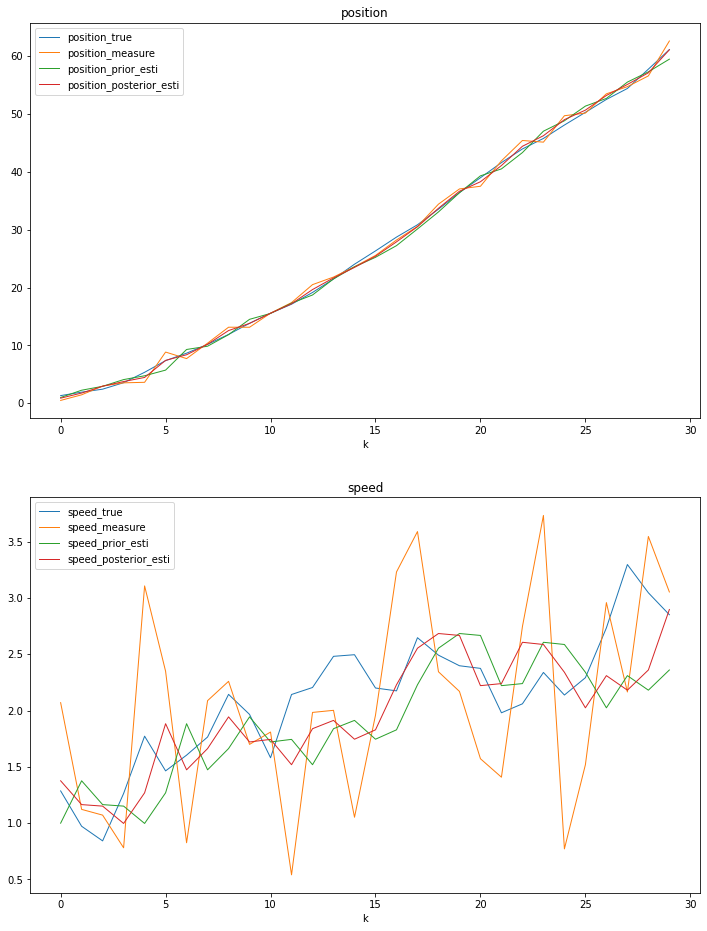

In [4]:
if __name__ == '__main__':
    # --------------------initialization-------------------
    X_true = np.array(X0)     # real state initialization
    X_posterior = np.array(X0)
    P_posterior = np.array(P0)

    position_true = []
    speed_true = []

    position_measure = []
    speed_measure = []
 
    position_prior_esti = []
    speed_prior_esti = []

    position_posterior_esti = []
    speed_posterior_esti = []

    for i in range(30):
        # ---------------------generate true values---------------------
        # generate process noise
        w = np.array([[gaussian_distribution_generator(np.sqrt(Q[0, 0]))],
                      [gaussian_distribution_generator(np.sqrt(Q[1, 1]))]])
        
        # generate true position and speed
        X_true = np.dot(A, X_true) + w
        position_true.append(X_true[0, 0])
        speed_true.append(X_true[1, 0])
        
        # ---------------------generate observed values---------------------
        # generate observation noise
        v = np.array([[gaussian_distribution_generator(np.sqrt(R[0, 0]))], 
                      [gaussian_distribution_generator(np.sqrt(R[1, 1]))]])
        
        # generate observed position and speed
        Z_measure = np.dot(H, X_true) + v
        position_measure.append(Z_measure[0, 0])
        speed_measure.append(Z_measure[1, 0])
        
        # ------------------------prior estimation--------------------------
        X_prior = np.dot(A, X_posterior)
        position_prior_esti.append(X_prior[0, 0])
        speed_prior_esti.append(X_prior[1, 0])
        
        # caluculate covariance matrix of prior estimation
        P_prior_1 = np.dot(A, P_posterior)
        P_prior = np.dot(P_prior_1, A.T) + Q
        
        # -----------------------calculate Kalman gain-----------------------
        k1 = np.dot(P_prior, H.T)
        k2 = np.dot(np.dot(H, P_prior), H.T) + R
        K = np.dot(k1, np.linalg.inv(k2))
        
        # -----------------------posterior estimation-------------------------
        X_posterior_1 = Z_measure - np.dot(H, X_prior)
        X_posterior = X_prior + np.dot(K, X_posterior_1)
        position_posterior_esti.append(X_posterior[0, 0])
        speed_posterior_esti.append(X_posterior[1, 0])
        
        # update covariance matrix of posterior estimation
        P_posterior_1 = np.eye(2) - np.dot(K, H)
        P_posterior = np.dot(P_posterior_1, P_prior)
    
    # visualization
    if True:
        fig= plt.figure(2, figsize=(12, 16))
        ax1 = fig.add_subplot(211)
        
        ax1.plot(position_true, '-', label='position_true', linewidth=1)
        ax1.plot(position_measure, '-', label='position_measure', linewidth=1)
        ax1.plot(position_prior_esti, '-', label='position_prior_esti', linewidth=1)
        ax1.plot(position_posterior_esti, '-', label='position_posterior_esti', linewidth=1)
        ax1.set_title('position')
        # add an x-label to the axes
        ax1.set_xlabel('k')
        ax1.legend()

        ax2 = fig.add_subplot(212)
        ax2.plot(speed_true, '-', label='speed_true', linewidth=1)
        ax2.plot(speed_measure, '-', label='speed_measure', linewidth=1)
        ax2.plot(speed_prior_esti, '-', label='speed_prior_esti', linewidth=1)
        ax2.plot(speed_posterior_esti, '-', label='speed_posterior_esti', linewidth=1)
        ax2.set_title('speed')
        ax2.set_xlabel('k')
        ax2.legend()
        
        plt.show()